- Regarding the result of the first notebook, we decided to apply supervised learning method in a similar data set ( IMDB 50000 movies reviews with label: negative & positive)
- So i will train and evaluate the result of my model on that data set, before applying the prediction in DC & Marvel data set.

In [1]:
# import all tools 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
pd.set_option('display.max_colwidth', None)
# import from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Read IMDB file

In [2]:
imdb_reviews = pd.read_csv('/Users/macbook/Documents/Iron Hack_Lab/IMDB Dataset.csv')

In [3]:
imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
imdb_reviews.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive


In [5]:
# Check nulls value in data set
imdb_reviews.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
# Check the distribution of positive and negative sentiments
imdb_reviews['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Preprocessing data

In [7]:
# Encode sentiment column
encoder = LabelEncoder()
imdb_reviews["sentiment"] = encoder.fit_transform(imdb_reviews["sentiment"])
imdb_reviews.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1


In [8]:
# Create the training and test datasets 
reviews = imdb_reviews['review']
sentiment = imdb_reviews['sentiment']
training_reviews = reviews[:40000]
training_sentiment = sentiment[:40000]
test_reviews = reviews[40000:]
test_sentiment = sentiment[40000:]

In [9]:
# Making sure we have a representative share of positives and negatives in the training dataset
training_sentiment.value_counts()

0    20007
1    19993
Name: sentiment, dtype: int64

In [10]:
# Define stopwords
stop_words=stopwords.words('english')

In [11]:
# Define function to clean reviews
def cleaning(data):
    #1. Tokenize
    text_tokens = word_tokenize(data.replace('’', "").lower())
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]   
    #joining
    return " ".join(text_cleaned)

In [12]:
# Removing html
training_reviews = training_reviews.apply(lambda x:BeautifulSoup(x,"html.parser").get_text())
test_reviews = test_reviews.apply(lambda x:BeautifulSoup(x,"html.parser").get_text())

# Clean data
training_reviews_cleaned = training_reviews.apply(cleaning)
test_reviews_cleaned = test_reviews.apply(cleaning)

In [13]:
#review text before & after cleaning 
training_reviews[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [14]:
training_reviews_cleaned[0]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz

# Feature Selection: Using BOW and TFIDF

In [16]:
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,3),sublinear_tf=True)
tv_train_features = tv.fit_transform(training_reviews_cleaned)

In [15]:
# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,3))
cv_train_features = cv.fit_transform(training_reviews_cleaned)

In [17]:
# Create features for test reviews
cv_test_features = cv.transform(test_reviews_cleaned)
tv_test_features = tv.transform(test_reviews_cleaned)

In [18]:
# Observe shape of the feature matrices
print("The shape of cv_train is ", cv_train_features.shape)
print("The shape of tv_train is ", tv_train_features.shape)
print("The shape of cv_test is ", cv_test_features.shape)
print("The shape of tv_test is ", tv_test_features.shape)

The shape of cv_train is  (40000, 6529513)
The shape of tv_train is  (40000, 6529513)
The shape of cv_test is  (10000, 6529513)
The shape of tv_test is  (10000, 6529513)


# Model

## LogisticRegression Model on BOW features

In [19]:
lr = LogisticRegression(penalty='l2', max_iter=100, C=1)

In [20]:
# Logistic Regression model on BOW features
lr.fit(cv_train_features,training_sentiment)

# predict value using model
predictions = lr.predict(cv_test_features) 

# predict probabilities using model
predictions_prob = lr.predict_proba(cv_test_features) 

/Users/macbook/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
predictions_prob

array([[9.99992616e-01, 7.38398457e-06],
       [9.99847075e-01, 1.52925044e-04],
       [5.76800013e-01, 4.23199987e-01],
       ...,
       [4.69319263e-01, 5.30680737e-01],
       [6.07506774e-01, 3.92493226e-01],
       [9.90584638e-01, 9.41536157e-03]])

In [22]:
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
# Predictions score
score = lr.score(cv_test_features,test_sentiment)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 90.0 %


In [24]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiment, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4993
           1       0.89      0.90      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 90.0%')

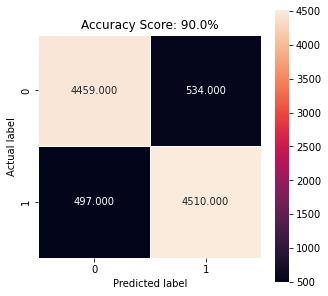

In [25]:
#confusion metric
cm = metrics.confusion_matrix(test_sentiment, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)


## LogisticRegression Model on TFIDF features

In [58]:
lr_tf = LogisticRegression(penalty='l2', max_iter=100, C=1)
# Logistic Regression model on BOW features
lr_tf.fit(tv_train_features,training_sentiment)

# predict value using model
predictions_tf = lr_tf.predict(tv_test_features) 

# predict probabilities using model
predictions_prob_tf = lr_tf.predict_proba(tv_test_features) 

In [59]:
score_tf = lr_tf.score(tv_test_features,test_sentiment)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 90.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 90.0%')

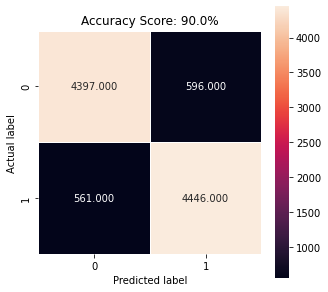

In [60]:
#confusion metric
cm = metrics.confusion_matrix(test_sentiment, predictions_tf)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)


- Both 2 models give us same accuracy around 90% to classify negative & positive results 
- Therefore, i decide to use logistic regression with BOW features for DC & Marvel data set

# Apply the model into data set to classify negative & positive

In [26]:
# Apply prediction to new dataset
# Import datasets
DC=pd.read_csv('/Users/macbook/Documents/Iron Hack_Lab/Final P/Dc/DC.csv')
Marvel=pd.read_csv('/Users/macbook/Documents/Iron Hack_Lab/Final P/Marvel/marvel.csv')

## Data cleaning, create BOW features

In [28]:
DC.drop(['Unnamed: 0.1','Unnamed: 0'],axis =1, inplace = True)

In [29]:
Marvel.drop(['Unnamed: 0.1','Unnamed: 0'],axis =1, inplace = True)

In [30]:
#change data type of date
DC['date']=pd.to_datetime(DC['date'],errors='coerce')
Marvel['date']=pd.to_datetime(Marvel['date'], errors='coerce')

In [31]:
def remove(data):
    data1 = data.replace('Was this review helpful','')
    data2 = data1.replace('Sign in to vote','')
    data3 = data2.replace('Permalink','')
    data4 = data3.replace('\n','')
    data5 = re.sub('\d* out of \d* found this helpful', '', data4)
    return data5


In [32]:
# Clean the reviews DC
DC['content_cleaned'] = DC['content'].apply(lambda x:remove(x))
DC['content_cleaned']=DC['content_cleaned'].apply(cleaning)

In [33]:
# Clean the reviews Marvel
Marvel['content_cleaned'] = Marvel['content'].apply(lambda x:remove(x))
Marvel['content_cleaned']=Marvel['content_cleaned'].apply(cleaning)

## Preprocessing: 

In [34]:
# Transform the DC reviews into Count Vectorizer feature matrix 
cv_DC_features = cv.transform(DC['content_cleaned'])

In [69]:
cv_MV_features = cv.transform(Marvel['content_cleaned'])

# Classify negative, positive, neutral for DC movie

In [35]:
# Predict sentiment for DC
DC_predictions = lr.predict(cv_DC_features)

In [40]:
DC_predictions.shape

(10202,)

In [37]:
DC.shape

(10202, 6)

In [38]:
DC['sentiment_biclass'] = DC_predictions

In [42]:
# Identify sentiment probabilities for DC
DC_predictions_prob = lr.predict_proba(cv_DC_features)

In [44]:
DC['positive_prob'] = DC_predictions_prob[:,1]

In [49]:
def assign_sentiment_triclass(positive_prob):
    sentiment_triclass = []
    if positive_prob >=0.7:
        sentiment_triclass = 'Positive'
    elif positive_prob <= 0.4:
        sentiment_triclass = 'Negative'
    else: sentiment_triclass = 'Neutral'
    return sentiment_triclass

In [50]:
DC['sentiment_triclass'] = DC['positive_prob'].apply(lambda x:assign_sentiment_triclass(x))

In [51]:
DC.head(6)

,review_title,date,content,rating,movie_title,content_cleaned,sentiment_biclass,positive_prob,sentiment_triclass
0,"Lying there Under, under the sea",2019-04-21,"Aquaman of DC comics finally gets his top billing in a film as the nicely put together Jason Momoa plays the title role in this science fiction epic. Already a\nsequel is in the works, in fact this film ends on an uncertain note setting up the\nstory line for the sequel.Lighthouse keeper Temura Morrison finds a woman with a trident on his beach\nand takes her in. Nicole Kidman is the woman and she's the queen of the under\nsea kingdom of Atlantis and she's running away from all that. The two fall in\nlove and have a kid who grows up to be Jason Momoa.But before that some Atlantian warriors show up and try to kidnap Kidman.\nThey're all killed, but Kidman decides to go back lest more come and harm her\nson.One would have to be blind not to miss the parallels between the story of the\nSword And The Stone and Aquaman. Momoa's earth name is Arthur Curry for\nthat matter. Now all grown up and quite fit and cut he's summoned to Atlantis to claim the crown. But first he has to find a magical trident stuck in a rock\nsomewhere in the sea. Can it get plainer than that.Aquaman also has a surface enemy in the son of a pirate whose father he killed\nwhen they were capturing a submarine.I did like the computer graphic special effects.used and loved the fantasy sea\nworld that was created.I can hardly wait for the sequel.",7/10,Aquaman,aquaman dc comic finally get top billing film nicely put together jason momoa play title role science fiction epic already asequel work fact film end uncertain note setting thestory line keeper temura morrison find woman trident beachand take nicole kidman woman queen undersea kingdom atlantis running away two fall inlove kid grows jason atlantian warrior show try kidnap killed kidman decides go back lest come harm would blind miss parallel story thesword stone aquaman momoa earth name arthur curry forthat matter grown quite fit cut summoned atlantis claim crown first find magical trident stuck rocksomewhere sea get plainer also surface enemy son pirate whose father killedwhen capturing like computer graphic special loved fantasy seaworld hardly wait sequel,1,0.829744,Positive
1,Indifferent,2020-01-12,"AQUAMAN is the latest superhero blockbuster from DC Comics and a surprisingly lacklustre affair. It's not particularly awful, it's just that I felt indifferent towards it, particularly with a hackneyed storyline that goes through all of the motions without ever offering much in the way of originality or innovation. Jason Momoa is a likeable presence as the big bear-like hero of the piece, but the undersea kingdom material feels more than a little silly and it doesn't help that established stars like Willem Dafoe, Patrick Wilson and Dolph Lundgren all look ridiculous in their costumes. An inflated running time and juvenile script had me feeling like this was a NEMO sequel at times, and it all ends in a climax that just goes for CGI effect after CGI effect, ad nauseum. Try harder, guys...",5/10,Aquaman,aquaman latest superhero blockbuster dc comic surprisingly lacklustre affair particularly awful felt indifferent towards particularly hackneyed storyline go motion without ever offering much way originality innovation jason momoa likeable presence big hero piece undersea kingdom material feel little silly help established star like willem dafoe patrick wilson dolph lundgren look ridiculous costume inflated running time juvenile script feeling like nemo sequel time end climax go cgi effect cgi effect ad nauseum try harder guy,0,0.000655,Negative
2,CGI extravaganza,2019-03-08,"In 1985, lighthouse keeper Tom Curry rescues a woman from the stormy sea. She's Atlanna (Nicole Kidman), The Queen of Atlantis. They have a son together named Arthur. In order to keep him safe, she leaves them for Atlantis where she is forced to marry another. Her advisor Vulko (Willem

In [52]:
#extract number of the rating
DC['rate']=DC['rating'].str[:2]

In [53]:
DC['rate']=DC['rate'].str.replace('/','')

In [54]:
DC['rate']= DC['rate'].apply(pd.to_numeric) 

In [ ]:
#DC.dropna(inplace=True)
#DC.reset_index(drop=True,inplace=True)

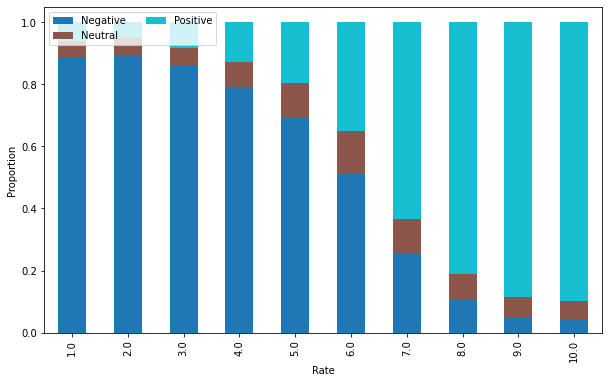

In [57]:
# visualize the porpotion of each sentiment against rate
cross_tab_prop = pd.crosstab(index=DC['rate'],
                             columns=DC['sentiment_triclass'],
                             normalize="index")
cross_tab_prop
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Rate")
plt.ylabel("Proportion")
plt.show()

- The stacked barchart present quite well the propotion between sentiment results against rate.
- There are more negative comments in rate between 1 to 5 and more positive comments in rate (7-10)

In [61]:
DC.head()

,review_title,date,content,rating,movie_title,content_cleaned,sentiment_biclass,positive_prob,sentiment_triclass,rate
0,"Lying there Under, under the sea",2019-04-21,"Aquaman of DC comics finally gets his top billing in a film as the nicely put together Jason Momoa plays the title role in this science fiction epic. Already a\nsequel is in the works, in fact this film ends on an uncertain note setting up the\nstory line for the sequel.Lighthouse keeper Temura Morrison finds a woman with a trident on his beach\nand takes her in. Nicole Kidman is the woman and she's the queen of the under\nsea kingdom of Atlantis and she's running away from all that. The two fall in\nlove and have a kid who grows up to be Jason Momoa.But before that some Atlantian warriors show up and try to kidnap Kidman.\nThey're all killed, but Kidman decides to go back lest more come and harm her\nson.One would have to be blind not to miss the parallels between the story of the\nSword And The Stone and Aquaman. Momoa's earth name is Arthur Curry for\nthat matter. Now all grown up and quite fit and cut he's summoned to Atlantis to claim the crown. But first he has to find a magical trident stuck in a rock\nsomewhere in the sea. Can it get plainer than that.Aquaman also has a surface enemy in the son of a pirate whose father he killed\nwhen they were capturing a submarine.I did like the computer graphic special effects.used and loved the fantasy sea\nworld that was created.I can hardly wait for the sequel.",7/10,Aquaman,aquaman dc comic finally get top billing film nicely put together jason momoa play title role science fiction epic already asequel work fact film end uncertain note setting thestory line keeper temura morrison find woman trident beachand take nicole kidman woman queen undersea kingdom atlantis running away two fall inlove kid grows jason atlantian warrior show try kidnap killed kidman decides go back lest come harm would blind miss parallel story thesword stone aquaman momoa earth name arthur curry forthat matter grown quite fit cut summoned atlantis claim crown first find magical trident stuck rocksomewhere sea get plainer also surface enemy son pirate whose father killedwhen capturing like computer graphic special loved fantasy seaworld hardly wait sequel,1,0.829744,Positive,7.0
1,Indifferent,2020-01-12,"AQUAMAN is the latest superhero blockbuster from DC Comics and a surprisingly lacklustre affair. It's not particularly awful, it's just that I felt indifferent towards it, particularly with a hackneyed storyline that goes through all of the motions without ever offering much in the way of originality or innovation. Jason Momoa is a likeable presence as the big bear-like hero of the piece, but the undersea kingdom material feels more than a little silly and it doesn't help that established stars like Willem Dafoe, Patrick Wilson and Dolph Lundgren all look ridiculous in their costumes. An inflated running time and juvenile script had me feeling like this was a NEMO sequel at times, and it all ends in a climax that just goes for CGI effect after CGI effect, ad nauseum. Try harder, guys...",5/10,Aquaman,aquaman latest superhero blockbuster dc comic surprisingly lacklustre affair particularly awful felt indifferent towards particularly hackneyed storyline go motion without ever offering much way originality innovation jason momoa likeable presence big hero piece undersea kingdom material feel little silly help established star like willem dafoe patrick wilson dolph lundgren look ridiculous costume inflated running time juvenile script feeling like nemo sequel time end climax go cgi effect cgi effect ad nauseum try harder guy,0,0.000655,Negative,5.0
2,CGI extravaganza,2019-03-08,"In 1985, lighthouse keeper Tom Curry rescues a woman from the stormy sea. She's Atlanna (Nicole Kidman), The Queen of Atlantis. They have a son together named Arthur. In order to keep him safe, she leaves them for Atlantis where she is forced to marry another. Her advisor 

In [ ]:
# drop unnecessary columns and export file
DC.drop(['sentiment_biclass', 'positive_prob','rating'], axis = 1, inplace = True) 


In [66]:
DC.rename(columns={'sentiment_triclass': 'sentiments'},inplace=True, errors='raise')

In [68]:
DC.to_csv('/Users/macbook/Documents/Iron Hack_Lab/Final P/Dc/DC_sentiment.csv')

# Classify negative, positive comments for Marvel movie:

In [70]:
Marvel_predictions = lr.predict(cv_MV_features)

In [71]:
Marvel['sentiment_biclass'] = Marvel_predictions

In [72]:
# Identify sentiment probabilities for DC
MV_predictions_prob = lr.predict_proba(cv_MV_features)

In [73]:
Marvel['positive_prob'] = MV_predictions_prob[:,1]

In [74]:
Marvel['sentiments'] = Marvel['positive_prob'].apply(lambda x:assign_sentiment_triclass(x))

In [76]:
Marvel['rate']=Marvel['rating'].str[:2]
Marvel['rate']=Marvel['rate'].str.replace('/','')
Marvel['rate']=Marvel['rate'].apply(pd.to_numeric) 

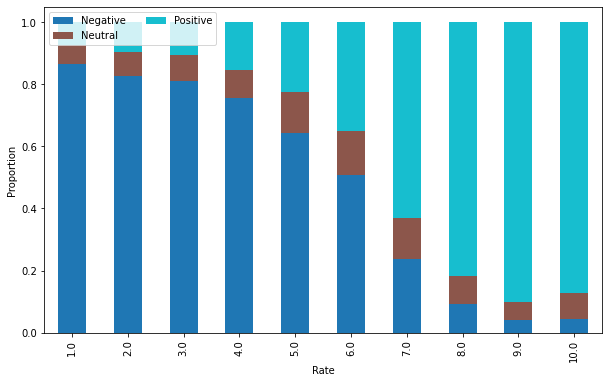

In [77]:
# visualize the porpotion of each sentiment against rate
cross_tab_prop = pd.crosstab(index=Marvel['rate'],
                             columns=Marvel['sentiments'],
                             normalize="index")
cross_tab_prop
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Rate")
plt.ylabel("Proportion")
plt.show()

In [79]:
Marvel.drop(['sentiment_biclass', 'positive_prob','rating'], axis = 1, inplace = True) 

In [80]:
Marvel.to_csv('/Users/macbook/Documents/Iron Hack_Lab/Final P/Marvel/Marvel_sentiment.csv')